# Cross-Cohort Music Recommendation - Clustering

Now that you've completed EDA, utilize your insights to select the correct model and subsequently apply machine learning on your dataset.



## Questions
Is this a supervised or unsupervised task? Furthermore are we performing classification or regression?  

Answer here

This is an unsupervised task, as we are not using labeled data to train a model. Instead, we are performing clustering to group similar songs based on their features.

Are you predicting for multiple classes or binary classes?  

Answer here

We are predicting for multiple classes, as we are clustering songs into several groups based on their features, rather than just two classes.

Given these observations, which machine learning model will you choose?  

Answer here

Since this is an unsupervised task focused on clustering, we will choose a clustering algorithm such as K-Means. These algorithms suitable for grouping similar data points without requiring labeled training data.
We will also consider the characteristics of the data, such as its distribution and dimensionality, to select the most appropriate clustering method.

### 1) Set up your predictors

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# TODO: import your selected model and its evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# TODO: load in dataset
df = pd.read_csv('../data/merged_music_embeds.csv')

# TODO: select your predictor columns
df = df[['PC1', 'PC2', 'PC3', 'PC4', 'genre']]
songs = pd.read_csv('../data/merged_music_embeds.csv')

In [29]:
songs.head()

,PC1,PC2,PC3,PC4,song,genre,filename
0,0.084061,-0.077482,-0.063781,-0.062144,A Fan's Mail,funk,A Fan's Mail
1,0.332044,-0.154053,-0.060291,0.151898,Abracadabra,pop,Abracadabra
2,-0.011686,0.194544,-0.046370,0.046979,Aguas De Marco,bossa nova,Aguas De Marco
3,0.009237,-0.109553,-0.111190,-0.089907,Another Time,hip hop,Another Time
4,0.308582,-0.040624,-0.119071,0.149660,Belong to the World,hip hop,Belong to the World


### 2) Search for best clusters

Use tools the elbow method or silhouette score to find the best clusters for your model.

In [30]:
#use the first 4 columns as predictors
X = df[['PC1', 'PC2', 'PC3', 'PC4']]    
#use the last column as target
y = df['genre']

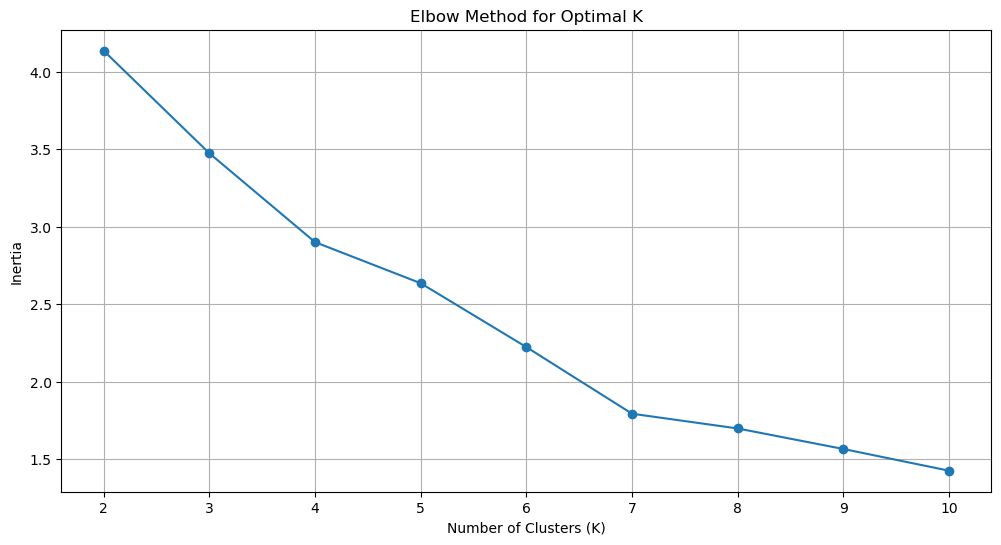

In [42]:
#use elbow method to find optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))   

#plot elbow method
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()  

### 3) Train your model

Select the model with best cluster number and generate predictions on your test set. Evaluate how "well" your model clustered songs by evaluating the songs that exist in the same cluster assignments. 

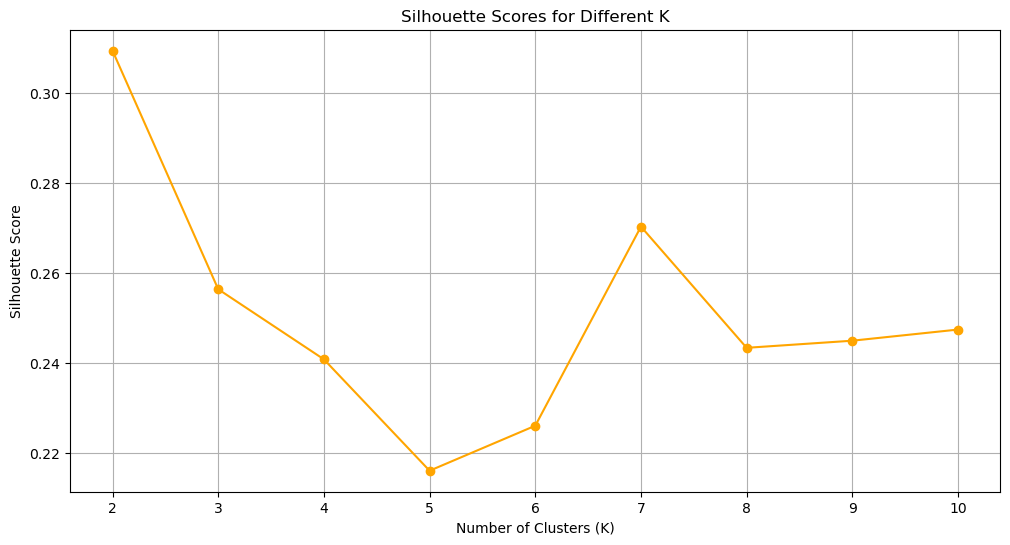

In [32]:
#plot silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid()
plt.show()  

In [33]:
#best K is the one with highest silhouette score
best_k = K[np.argmax(silhouette_scores)]
print(f'Best K: {best_k}')  

Best K: 2


In [34]:
#best k from elbow method
best_k_elbow = K[np.argmin(np.diff(inertia))]
print(f'Best K from Elbow Method: {best_k_elbow}')

Best K from Elbow Method: 2


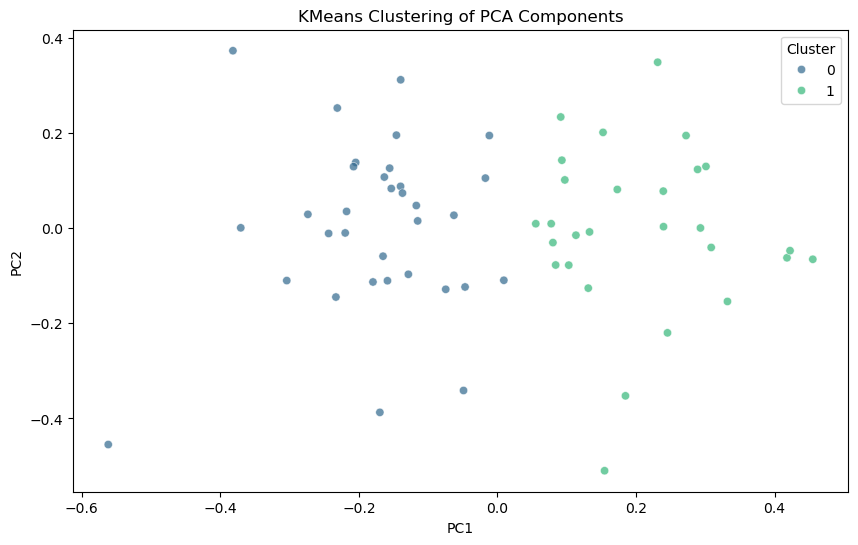

In [35]:
#train KMeans model with best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)   
#add cluster labels to dataframe
df['cluster'] = kmeans.labels_
#plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()  

In [36]:
# predict your labels on your predictors and assign it to a new column
labels = kmeans.predict(X)
songs["labels"] = labels

# view your cluster assignments
labeled_music = songs[["filename", "genre", "labels"]]
labeled_music.head()

,filename,genre,labels
0,A Fan's Mail,funk,1
1,Abracadabra,pop,1
2,Aguas De Marco,bossa nova,0
3,Another Time,hip hop,0
4,Belong to the World,hip hop,1


In [40]:
# view the songs that fall into specific clusters, what sort of insight do you think was captured here?
labeled_music[labeled_music["labels"] == 1]


,filename,genre,labels
0,A Fan's Mail,funk,1
1,Abracadabra,pop,1
4,Belong to the World,hip hop,1
7,Calabria 2008,electronic,1
8,Dancer,rock,1
9,Diamonds,pop,1
13,Electric Feel,pop,1
15,Frederick,rock,1
16,Freedom Time,hip hop,1
17,Freefall,house,1


Serialize your model and run it in your dashboard via `streamlit run recommender.py`

In [39]:
# serialize your model
import joblib

joblib.dump(kmeans, "../kmeans_model.pkl")

['../kmeans_model.pkl']